In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [3]:
from fastai.text.all import *
path = untar_data(URLs.AG_NEWS)

In [4]:
path.ls()

(#7) [Path('/storage/data/ag_news_csv/test'),Path('/storage/data/ag_news_csv/test.csv'),Path('/storage/data/ag_news_csv/.ipynb_checkpoints'),Path('/storage/data/ag_news_csv/train'),Path('/storage/data/ag_news_csv/classes.txt'),Path('/storage/data/ag_news_csv/readme.txt'),Path('/storage/data/ag_news_csv/train.csv')]

In [ ]:
import csv
csv_file = path/'train.csv'
txt_file = path/'train.txt'
with open(txt_file, "w") as my_output_file:
    with open(csv_file, "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

In [6]:
get_ag = partial(get_text_files, folders=['train', 'test'])

dls_lm = DataBlock(
    blocks=TextBlock.from_folder(path, is_lm=True),
    get_items=get_ag, splitter=RandomSplitter(0.1)
).dataloaders(path, path=path, bs=128, seq_len=80)

In [7]:
dls_lm.show_batch(max_n=2)

,text,text_
0,"xxbos "" 3"",""wall xxmaj st . xxmaj bears xxmaj claw xxmaj back xxmaj into the xxmaj black ( reuters)"",""reuters - xxmaj short - sellers , xxmaj wall xxmaj street 's dwindling \ band of ultra - cynics , are seeing green again . "" \n "" 3"",""carlyle xxmaj looks xxmaj toward xxmaj commercial xxmaj aerospace ( reuters)"",""reuters - xxmaj private investment firm xxmaj carlyle xxmaj group , \ which has a reputation for making well - timed and occasionally \",""" 3"",""wall xxmaj st . xxmaj bears xxmaj claw xxmaj back xxmaj into the xxmaj black ( reuters)"",""reuters - xxmaj short - sellers , xxmaj wall xxmaj street 's dwindling \ band of ultra - cynics , are seeing green again . "" \n "" 3"",""carlyle xxmaj looks xxmaj toward xxmaj commercial xxmaj aerospace ( reuters)"",""reuters - xxmaj private investment firm xxmaj carlyle xxmaj group , \ which has a reputation for making well - timed and occasionally \ controversial"
1,"$ 900 million by selling its 10.5 percent stake in xxmaj hyundai xxmaj motor xxmaj co. xxmaj ltd . on xxmaj monday , a remnant of its dented ambitions to build a global carmaking empire . "" \n "" 4"",""ap : xxmaj group xxmaj discovers xxmaj john the xxmaj baptist xxmaj cave ( ap)"",""ap - xxmaj archaeologists said xxmaj monday they have found a cave where they believe xxmaj john the xxmaj baptist anointed many of his disciples # 151","900 million by selling its 10.5 percent stake in xxmaj hyundai xxmaj motor xxmaj co. xxmaj ltd . on xxmaj monday , a remnant of its dented ambitions to build a global carmaking empire . "" \n "" 4"",""ap : xxmaj group xxmaj discovers xxmaj john the xxmaj baptist xxmaj cave ( ap)"",""ap - xxmaj archaeologists said xxmaj monday they have found a cave where they believe xxmaj john the xxmaj baptist anointed many of his disciples # 151 ;"


In [9]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3, 
    metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(lr_min=3.311311274956097e-07, lr_steep=6.309573450380412e-07)

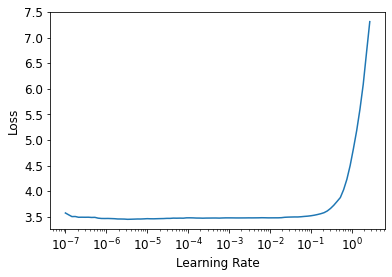

In [15]:
learn.lr_find()

In [23]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.195382,None,None,None,06:23
1,3.129096,None,None,None,06:23
2,3.021339,None,None,None,06:24
3,3.082351,None,None,None,06:23


/opt/conda/envs/fastai/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/opt/conda/envs/fastai/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/opt/conda/envs/fastai/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/opt/conda/envs/fastai/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


In [32]:
TEXT = "A reporter asked a man on a street"
N_WORDS = 60
N_SENTENCES = 3
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) 
         for _ in range(N_SENTENCES)]

In [33]:
print("\n".join(preds))

a reporter asked a man on a street to speak over a young woman 's daughter . " 
 " 4","microsoft Would Be Hard To Bite Out of Family Suit " , " NEW YORK ( reuters ) - Microsoft are trying to create a new Microsoft Corp . tool for a new Windows
a reporter asked a man on a street to put him in the middle of a marathon crowd . That 's what the man who has said Sunday was responsible for from writing off Sundays convention , which has changed the nature of the bloggers . " 
 " 4","microsoft Unveils New Version of Microsoft Media Player Promises
a reporter asked a man on a street to wear a plastic bag as he watched an intruder who was trying to steal her daughter 's body . " 
 " 1","japan Asks Police to Warn of Harm in Future Media ( reuters)","reuters - Japan 's Supreme Court on Friday urged Prime Minister Junichiro
